In [1]:
import os
os.chdir(r"C:\Users\TYC\Documents\Year 2 Sem 3 Resources\MP\Tutorial Notes\Week 9")

import sys
# Python 3.7 is required
assert sys.version_info >= (3,7)

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Make sure that optimization is enabled
if not cv.useOptimized():
    cv.setUseOptimized(True)

cv.useOptimized()

True

#### Q1) Apply Hough transform (circular objects detection) and blob detection algorithm to detect coins present in image 'coins_1.jfif'. Comment on the outcomes of two methods.

In [2]:
img = cv.imread('coins_1.jfif')
img_copy=img.copy()
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

#Hough Circle Transform
row = img.shape[0]
circles = cv.HoughCircles(gray, cv.HOUGH_GRADIENT, 1, row/16, param1=240, param2=25, minRadius=row//10, maxRadius=row//4)

#draw circle
if circles is not None:
    circles = np.uint8(np.around(circles))
    for i in circles[0]:
        #plot the center
        center=(i[0],i[1])
        cv.circle(img, center, 1, (100,100,100), 2)
        #radius
        radius = i[2]
        cv.circle(img, center, radius, (0,0,255), 2)

cv.imshow('result',np.hstack((img_copy,img)))
cv.waitKey(0)
cv.destroyAllWindows()

In [3]:
img = cv.imread('coins_1.jfif')
img_copy=img.copy()
blur = cv.medianBlur(img,5)
gray=cv.cvtColor(blur,cv.COLOR_BGR2GRAY)

#set up parameter
params = cv.SimpleBlobDetector_Params()

params.filterByArea = True
params.filterByConvexity = False
params.filterByInertia = False
params.filterByColor = False #why?
params.filterByCircularity = True #why??

#detector
detector = cv.SimpleBlobDetector_create(params)
keypoints = detector.detect(gray)

#draw
im_keypoints = cv.drawKeypoints(img, keypoints, np.array([]), (0,0,255), cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

cv.imshow('result',np.hstack((img_copy,im_keypoints)))
cv.waitKey(0)
cv.destroyAllWindows()

blob detection seems to be able to get a more accurate read compared to hough transform

#### Q2) Apply k-means clustering on 'zebra.jfif' to segment out the zebra.
##### - You are required to determine the optimal k by plotting the within cluster sum of squares vs number of clusters (2-10).
##### - Apply the clustering method on 2 color space: BGR and HSV and compare the results obtained.

##### RGB

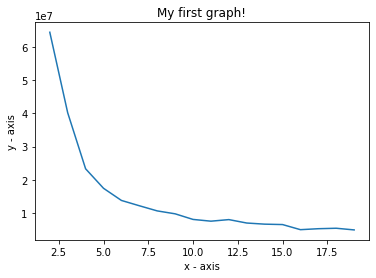

In [4]:
#for act 2, do a for loop for k=2 to 10 and get the label where ret(WCSOS) is minimum or converging
img = cv.imread('zebra.jfif')
img = cv.medianBlur(img, 3)

#1 reshape img and change data type
img_reshape = img.reshape((-1,3))
#img_reshape = img_rgb.reshape((img_rgb.shape[0]*img_rgb.shape[1], 3)) #previous one or this
img_reshape = np.float32(img_reshape)

X=[]
Y=[]
O=[]
index=0
max_K=20

for K in range(2,max_K):
    #2 perform k-means clustering
    criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)
    attempts = 10
    O.append(cv.kmeans(img_reshape, K, None, criteria, attempts, cv.KMEANS_RANDOM_CENTERS))
    
for i in range(len(O)):
    X.append(i+2)
    Y.append(O[i][0])
    if(O[i][0]<O[index][0]): index=i # get index of smallest ret/WCSOS

import matplotlib.pyplot as plt
  
plt.plot(X, Y)
plt.xlabel('x - axis')
plt.ylabel('y - axis')
plt.title('My first graph!')
plt.show()

In [5]:
white_thresh=175
black_thresh=149

In [6]:
#3 visualize
center = np.uint8(O[index][2])
res = center[O[index][1].flatten()]
seg_res = res.reshape(img.shape)

from numpy import linalg as LN

white_color = (255,255,255)
black_color = (0,0,0)

idx_white=[]
idx_black=[]

for i in range(len(center)): 
    if(LN.norm(white_color-center[i])<white_thresh): idx_white.append(i)
        
for i in range(len(center)): 
    if(LN.norm(black_color-center[i])<black_thresh): idx_black.append(i)
        
final_mask = np.zeros(seg_res.shape, dtype = np.uint8)

for i in idx_white: 
    mask = (seg_res == center[i]).astype("uint8")*255
    final_mask = np.bitwise_or(final_mask,mask)

for i in idx_black: 
    mask = (seg_res == center[i]).astype("uint8")*255
    final_mask = np.bitwise_or(final_mask,mask)

kernel = np.ones((3,3), np.uint8)
    
final_mask = cv.dilate(final_mask, kernel, iterations = 2)
final_mask = cv.erode(final_mask, kernel, iterations = 2)   

seg_res=np.bitwise_and(final_mask,seg_res)

cv.imshow('segmented image',seg_res)
cv.waitKey(0)
cv.destroyAllWindows()

In [7]:
#trackbar callback functions
def nothing(x):
    pass#for act 2, do a for loop for k=2 to 10 and get the label where ret(WCSOS) is minimum or converging
img = cv.imread('zebra.jfif')
img = cv.medianBlur(img, 3)

#1 reshape img and change data type
img_reshape = img.reshape((-1,3))
#img_reshape = img_rgb.reshape((img_rgb.shape[0]*img_rgb.shape[1], 3)) #previous one or this
img_reshape = np.float32(img_reshape)
X=[]
Y=[]
O=[]
index=0
max_K=20

for K in range(2,max_K):
    #2 perform k-means clustering
    criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)
    attempts = 10
    O.append(cv.kmeans(img_reshape, K, None, criteria, attempts, cv.KMEANS_RANDOM_CENTERS))
    
for i in range(len(O)):
    X.append(i+2)
    Y.append(O[i][0])
    if(O[i][0]<O[index][0]): index=i # get index of smallest ret/WCSOS

#create widnow to containt he trackbar
windowname = "Zebra filter"
cv.namedWindow(windowname)
cv.moveWindow(windowname, 100, 100)
cv.createTrackbar("white dist", windowname, white_thresh, 450, nothing)
cv.createTrackbar("black dist", windowname, black_thresh, 450, nothing)

while 1:
    #get trackbar position
    white_dist = cv.getTrackbarPos("white dist", windowname)
    black_dist = cv.getTrackbarPos("black dist", windowname)
    
    #filter
    center = np.uint8(O[index][2])
    res = center[O[index][1].flatten()]
    seg_res = res.reshape(img.shape)

    from numpy import linalg as LN

    white_color = (255,255,255)
    black_color = (0,0,0)

    idx_white=[]
    idx_black=[]

    for i in range(len(center)): 
        if(LN.norm(white_color-center[i])<white_dist): idx_white.append(i)

    for i in range(len(center)): 
        if(LN.norm(black_color-center[i])<black_dist): idx_black.append(i) 

    final_mask = np.zeros(seg_res.shape, dtype = np.uint8)

    for i in idx_white: 
        mask = (seg_res == center[i]).astype("uint8")*255
        final_mask = np.bitwise_or(final_mask,mask)

    for i in idx_black: 
        mask = (seg_res == center[i]).astype("uint8")*255
        final_mask = np.bitwise_or(final_mask,mask)
    
    kernel = np.ones((3,3), np.uint8)
    
    final_mask = cv.dilate(final_mask, kernel, iterations = 2)
    final_mask = cv.erode(final_mask, kernel, iterations = 2) 
    
    seg_res=np.bitwise_and(final_mask,seg_res)
        
    cv.imshow(windowname, seg_res)
    k=cv.waitKey(1) & 0xFF
    if k == 27: break
        
cv.destroyAllWindows()

##### HSV

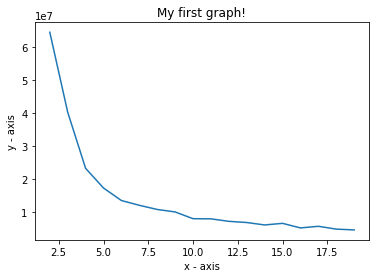

In [8]:
#for act 2, do a for loop for k=2 to 10 and get the label where ret(WCSOS) is minimum or converging
img = cv.imread('zebra.jfif')
img = cv.medianBlur(img, 3)

#1 reshape img and change data type
img_reshape = img.reshape((-1,3))
#img_reshape = img_rgb.reshape((img_rgb.shape[0]*img_rgb.shape[1], 3)) #previous one or this
img_reshape = np.float32(img_reshape)

X=[]
Y=[]
O=[]
index=0
max_K=20

for K in range(2,max_K):
    #2 perform k-means clustering
    criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)
    attempts = 10
    O.append(cv.kmeans(img_reshape, K, None, criteria, attempts, cv.KMEANS_RANDOM_CENTERS))
    
for i in range(len(O)):
    X.append(i+2)
    Y.append(O[i][0])
    if(O[i][0]<O[index][0]): index=i # get index of smallest ret/WCSOS

import matplotlib.pyplot as plt
  
plt.plot(X, Y)
plt.xlabel('x - axis')
plt.ylabel('y - axis')
plt.title('My first graph!')
plt.show()

In [9]:
white_thresh=153
black_thresh=137

In [10]:
#3 visualize
center = np.uint8(O[index][2])
res = center[O[index][1].flatten()]
seg_res = res.reshape(img.shape)

from numpy import linalg as LN

white_color = (255,255,255)
black_color = (0,0,0)

idx_white=[]
idx_black=[]

for i in range(len(center)): 
    if(LN.norm(white_color-center[i])<white_thresh): idx_white.append(i)
        
for i in range(len(center)): 
    if(LN.norm(black_color-center[i])<black_thresh): idx_black.append(i)
        
final_mask = np.zeros(seg_res.shape, dtype = np.uint8)

for i in idx_white: 
    mask = (seg_res == center[i]).astype("uint8")*255
    final_mask = np.bitwise_or(final_mask,mask)

for i in idx_black: 
    mask = (seg_res == center[i]).astype("uint8")*255
    final_mask = np.bitwise_or(final_mask,mask)

kernel = np.ones((3,3), np.uint8)
    
final_mask = cv.dilate(final_mask, kernel, iterations = 2)
final_mask = cv.erode(final_mask, kernel, iterations = 2)   

seg_res=np.bitwise_and(final_mask,seg_res)

cv.imshow('segmented image',seg_res)
cv.waitKey(0)
cv.destroyAllWindows()

In [11]:
#trackbar callback functions
def nothing(x):
    pass#for act 2, do a for loop for k=2 to 10 and get the label where ret(WCSOS) is minimum or converging
img = cv.imread('zebra.jfif')
img = cv.medianBlur(img, 3)

#1 reshape img and change data type
img_reshape = img.reshape((-1,3))
#img_reshape = img_rgb.reshape((img_rgb.shape[0]*img_rgb.shape[1], 3)) #previous one or this
img_reshape = np.float32(img_reshape)

X=[]
Y=[]
O=[]
index=0
max_K=20

for K in range(2,max_K):
    #2 perform k-means clustering
    criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)
    attempts = 10
    O.append(cv.kmeans(img_reshape, K, None, criteria, attempts, cv.KMEANS_RANDOM_CENTERS))
    
for i in range(len(O)):
    X.append(i+2)
    Y.append(O[i][0])
    if(O[i][0]<O[index][0]): index=i # get index of smallest ret/WCSOS

#create widnow to containt he trackbar
windowname = "Zebra filter"
cv.namedWindow(windowname)
cv.moveWindow(windowname, 100, 100)
cv.createTrackbar("white dist", windowname, white_thresh, 450, nothing)
cv.createTrackbar("black dist", windowname, black_thresh, 450, nothing)

while 1:
    #get trackbar position
    white_dist = cv.getTrackbarPos("white dist", windowname)
    black_dist = cv.getTrackbarPos("black dist", windowname)
    
    #filter
    center = np.uint8(O[index][2])
    res = center[O[index][1].flatten()]
    seg_res = res.reshape(img.shape)

    from numpy import linalg as LN

    white_color = (208,22,214)
    black_color = (0,19,36)

    idx_white=[]
    idx_black=[]

    for i in range(len(center)): 
        if(LN.norm(white_color-center[i])<white_dist): idx_white.append(i)

    for i in range(len(center)): 
        if(LN.norm(black_color-center[i])<black_dist): idx_black.append(i) 

    final_mask = np.zeros(seg_res.shape, dtype = np.uint8)

    for i in idx_white: 
        mask = (seg_res == center[i]).astype("uint8")*255
        final_mask = np.bitwise_or(final_mask,mask)

    for i in idx_black: 
        mask = (seg_res == center[i]).astype("uint8")*255
        final_mask = np.bitwise_or(final_mask,mask)
    
    kernel = np.ones((3,3), np.uint8)
    
    final_mask = cv.dilate(final_mask, kernel, iterations = 2)
    final_mask = cv.erode(final_mask, kernel, iterations = 2) 
    
    seg_res=np.bitwise_and(final_mask,seg_res)
        
    cv.imshow(windowname, seg_res)
    k=cv.waitKey(1) & 0xFF
    if k == 27: break
        
cv.destroyAllWindows()

HSV seems to have a harder time segmenting black and white, as shown in the holes in the zebra in HSV which is more than that in RGB